In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
#create spark session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import *
from pyspark.sql.window import Window

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("/FileStore/tables/IPL_DATA_ANALYSIS/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("/FileStore/tables/IPL_DATA_ANALYSIS/Match.csv")

In [0]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("/FileStore/tables/IPL_DATA_ANALYSIS/Player.csv")

In [0]:
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("/FileStore/tables/IPL_DATA_ANALYSIS/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("/FileStore/tables/IPL_DATA_ANALYSIS/Team.csv")

In [0]:
#filter to include only valid deliveries(excluding wides and no-balls)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

#Aggregation : Calculation of total and average runs scored in each match and inning
total_and_average_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
#Window Function: Calculate running total of runs in each match for each over
windowSpecification = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpecification)
)

#Condition Column: Flag for high impact balls(more than 6 runs or a wicket)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6 ) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
# Extracting year, month, and day from match date
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win : categorizing win margins into "high", "medium", and "low"
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High").when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium").otherwise("Low")
)

match_df = match_df.withColumn(
    "toss_and_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+---------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_and_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+---------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangal

In [0]:
player_df.show(5)


+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
#Normalize and clean player names
player_df = player_df.withColumn(
    "player_name",
    lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", ""))
)

#Handle missing values in "batting_hand" and "bowling_skill" with a default "unknown"
player_df = player_df.na.fill({"batting_hand" : "unknown", "bowling_skill" : "unknown"})

#Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_format",
    when(col("batting_hand").contains("Left-hand bat"), "Left-Handed").otherwise("Right-handed")
)

player_df.show(3)

+---------+---------+-----------+----+--------------+----------------+------------+--------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_format|
+---------+---------+-----------+----+--------------+----------------+------------+--------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India|   Left-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand|  Right-handed|
|        2|        3| rt ponting|null|Right-hand bat|Right-arm medium|   Australia|  Right-handed|
+---------+---------+-----------+----+--------------+----------------+------------+--------------+
only showing top 3 rows



In [0]:
player_match_df.show(3)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|             -

In [0]:
#Add a "veteran_status" column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35 , "Veteran").otherwise("Non-Veteran")
)

#Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+--------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|batting_format|
+---------+---------+---------------+----+--------------+------------------+------------+--------------+
|        0|        1|     sc ganguly|null| Left-hand bat|  Right-arm medium|       India|   Left-Handed|
|        1|        2|    bb mccullum|null|Right-hand bat|  Right-arm medium| New Zealand|  Right-handed|
|        2|        3|     rt ponting|null|Right-hand bat|  Right-arm medium|   Australia|  Right-handed|
|        3|        4|      dj hussey|null|Right-hand bat|Right-arm offbreak|   Australia|  Right-handed|
|        4|        5|mohammad hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|  Right-handed|
+---------+---------+---------------+----+--------------+------------------+------------+--------------+
only showing top 5 rows



In [0]:
#Create Temporary View for ball_by_ball, match, player, player_match, team from respective Dataframe
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")

In [0]:
match_df.createOrReplaceTempView("match")

In [0]:
player_df.createOrReplaceTempView("player")

In [0]:
player_match_df.createOrReplaceTempView("player_match")

In [0]:
team_df.createOrReplaceTempView("team")

In [0]:
%sql
SELECT *
FROM player

player_sk,player_id,player_name,dob,batting_hand,bowling_skill,country_name,batting_format
0,1,sc ganguly,null,Left-hand bat,Right-arm medium,India,Left-Handed
1,2,bb mccullum,null,Right-hand bat,Right-arm medium,New Zealand,Right-handed
2,3,rt ponting,null,Right-hand bat,Right-arm medium,Australia,Right-handed
3,4,dj hussey,null,Right-hand bat,Right-arm offbreak,Australia,Right-handed
4,5,mohammad hafeez,null,Right-hand bat,Right-arm offbreak,Pakistan,Right-handed
5,6,r dravid,null,Right-hand bat,Right-arm offbreak,India,Right-handed
6,7,w jaffer,null,Right-hand bat,Right-arm offbreak,India,Right-handed
7,8,v kohli,null,Right-hand bat,Right-arm medium,India,Right-handed
8,9,jh kallis,null,Right-hand bat,Right-arm fast-medium,South Africa,Right-handed
9,10,cl white,null,Right-hand bat,Legbreak googly,Australia,Right-handed


In [0]:
ball_by_ball_df.columns

Out[51]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
#Find top scoring batsmen per season using temp view
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
top_scoring_batsmen_per_season.show(40)

+----------------+-----------+----------+
|     player_name|season_year|total_runs|
+----------------+-----------+----------+
|        se marsh|       2008|       614|
|       g gambhir|       2008|       532|
|   st jayasuriya|       2008|       508|
|       sr watson|       2008|       463|
|        gc smith|       2008|       437|
|    ac gilchrist|       2008|       431|
|       yk pathan|       2008|       430|
|        sk raina|       2008|       420|
|        ms dhoni|       2008|       414|
|        v sehwag|       2008|       399|
|       rg sharma|       2008|       399|
|        r dravid|       2008|       370|
|      sc ganguly|       2008|       349|
|        s dhawan|       2008|       340|
|   kc sangakkara|       2008|       319|
|       dj hussey|       2008|       318|
|      rv uthappa|       2008|       316|
|     sa asnodkar|       2008|       311|
|    yuvraj singh|       2008|       299|
|        pa patel|       2008|       297|
| y venugopal rao|       2008|    

In [0]:
%sql
SELECT *
FROM match

match_sk,match_id,team1,team2,match_date,season_year,venue_name,city_name,country_name,toss_winner,match_winner,toss_name,win_type,outcome_type,manofmach,win_margin,country_id,year,month,day,win_margin_category,toss_and_match_winner
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,null,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1,null,null,null,High,No
1,335988,Kings XI Punjab,Chennai Super Kings,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1,null,null,null,Low,Yes
2,335989,Delhi Daredevils,Rajasthan Royals,null,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1,null,null,null,Low,No
3,335990,Mumbai Indians,Royal Challengers Bangalore,null,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1,null,null,null,Low,No
4,335991,Kolkata Knight Riders,Deccan Chargers,null,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1,null,null,null,Low,No
5,335992,Rajasthan Royals,Kings XI Punjab,null,2008,Sawai Mansingh Stadium,Jaipur,India,Kings XI Punjab,Rajasthan Royals,bat,wickets,Result,SR Watson,6,1,null,null,null,Low,No
6,335993,Deccan Chargers,Delhi Daredevils,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Deccan Chargers,Delhi Daredevils,bat,wickets,Result,V Sehwag,9,1,null,null,null,Low,No
7,335994,Chennai Super Kings,Mumbai Indians,null,2008,"MA Chidambaram Stadium, Chepauk",Chennai,India,Mumbai Indians,Chennai Super Kings,field,runs,Result,ML Hayden,6,1,null,null,null,Low,No
8,335995,Deccan Chargers,Rajasthan Royals,null,2008,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Rajasthan Royals,Rajasthan Royals,field,wickets,Result,YK Pathan,3,1,null,null,null,Low,Yes
9,335996,Kings XI Punjab,Mumbai Indians,null,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Mumbai Indians,Kings XI Punjab,field,runs,Result,KC Sangakkara,66,1,null,null,null,Medium,No


In [0]:
#Find what is the toss impact on individual matches using temporary view
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name AS toss_decission, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

In [0]:
toss_impact_individual_matches.show()

+--------+--------------------+--------------+--------------------+-------------+
|match_id|         toss_winner|toss_decission|        match_winner|match_outcome|
+--------+--------------------+--------------+--------------------+-------------+
|  335987|Royal Challengers...|         field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|           bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|           bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|           bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|           bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|           bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|           bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|         field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|         field|    Rajasthan Royals|          Won|
|  335996|      

In [0]:
#Find the economical bowlers during power play
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")

In [0]:
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|            0|
|     ankit soni|               0.5|            0|
|      gr napier|               0.5|            0|
|       aj finch|               0.5|            0|
|        a zampa|               0.5|            0|
|     avesh khan|               0.5|            0|
|       nb singh|0.5833333333333334|            0|
|     ag murtaza|0.6538461538461539|            0|
|      sb bangar|0.6666666666666666|            0|
|     d du preez|0.6666666666666666|            0|
|        s gopal|0.6666666666666666|            0|
|     fh edwards|0.6923076923076923|            0|
|       a kumble|0.7685185185185185|            0|
|j syed mohammad|0.7777777777777778|            0|
|   kp pietersen|0.7777777777777778|            0|
|       umar gul|0.7777777777777778|            0|
|  la carseldine|0.833333333333

In [0]:
import matplotlib.pyplot as plt

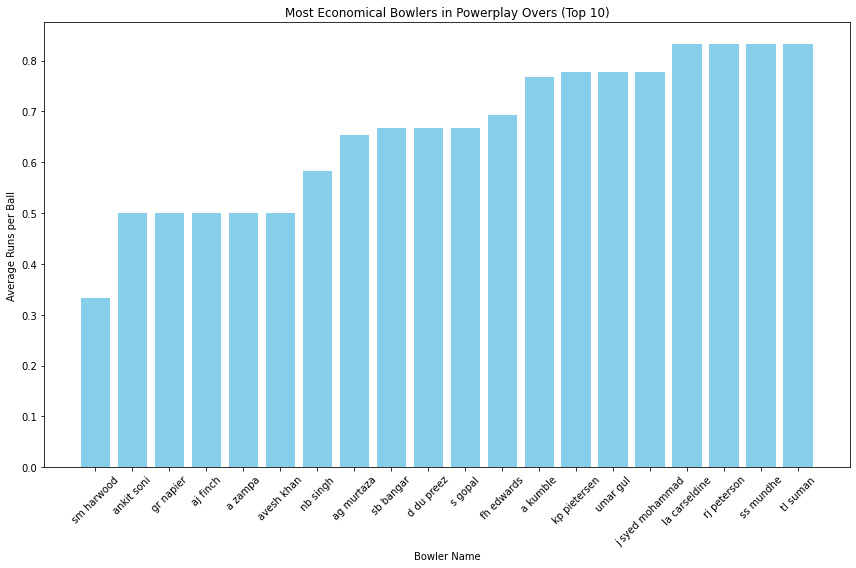

In [0]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
top_economical_bowlers = economical_bowlers_pd.nsmallest(20, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

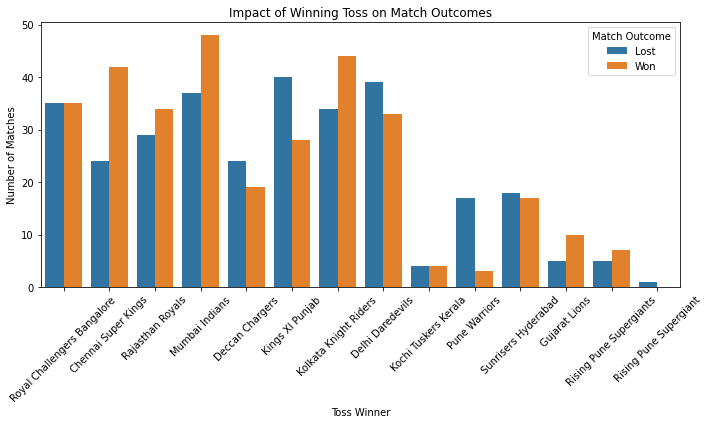

In [0]:
# Visualizing using seabon
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
#Find team performance regarding to toss win scenarios
team_toss_win_performance = spark.sql("""
SELECT team1 as Team, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss_win
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss_win DESC
""")

In [0]:
team_toss_win_performance.show()

+--------------------+--------------+-------------------+
|                Team|matches_played|wins_after_toss_win|
+--------------------+--------------+-------------------+
| Chennai Super Kings|            37|                 27|
|      Mumbai Indians|            42|                 26|
|Kolkata Knight Ri...|            36|                 24|
|Royal Challengers...|            34|                 19|
|    Delhi Daredevils|            36|                 17|
|    Rajasthan Royals|            25|                 16|
|     Kings XI Punjab|            32|                 14|
| Sunrisers Hyderabad|            16|                  8|
|     Deccan Chargers|            22|                  6|
|Rising Pune Super...|             6|                  4|
|       Gujarat Lions|             7|                  3|
|Kochi Tuskers Kerala|             4|                  2|
|       Pune Warriors|            10|                  2|
+--------------------+--------------+-------------------+



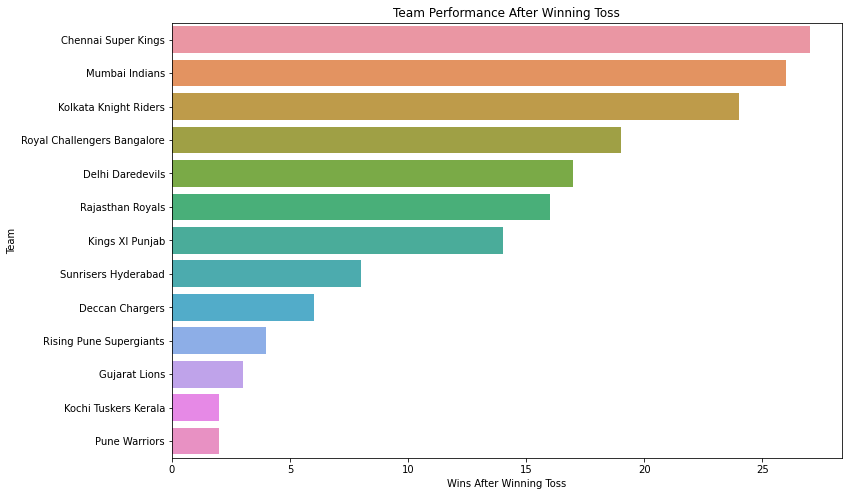

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss_win', y='Team', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()